# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import tensorflow as tf
print(tf.__version__)  # Should print 2.17.0
print(dir(tf.keras.preprocessing.image))  # Check if ImageDataGenerator exists


2.17.0
['DirectoryIterator', 'ImageDataGenerator', 'Iterator', 'NumpyArrayIterator', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'apply_affine_transform', 'apply_brightness_shift', 'apply_channel_shift', 'array_to_img', 'img_to_array', 'load_img', 'random_brightness', 'random_channel_shift', 'random_rotation', 'random_shear', 'random_shift', 'random_zoom', 'save_img', 'smart_resize']


In [3]:
import tensorflow as tf
print(dir(tf.keras))


['DTypePolicy', 'FloatDTypePolicy', 'Function', 'Initializer', 'Input', 'InputSpec', 'KerasTensor', 'Layer', 'Loss', 'Metric', 'Model', 'Operation', 'Optimizer', 'Quantizer', 'Regularizer', 'Sequential', 'StatelessScope', 'SymbolicScope', 'Variable', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'activations', 'applications', 'backend', 'callbacks', 'config', 'constraints', 'datasets', 'device', 'distribution', 'dtype_policies', 'export', 'initializers', 'layers', 'legacy', 'losses', 'metrics', 'mixed_precision', 'models', 'name_scope', 'ops', 'optimizers', 'preprocessing', 'quantizers', 'random', 'regularizers', 'tree', 'utils', 'version']


In [4]:
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt




Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [6]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

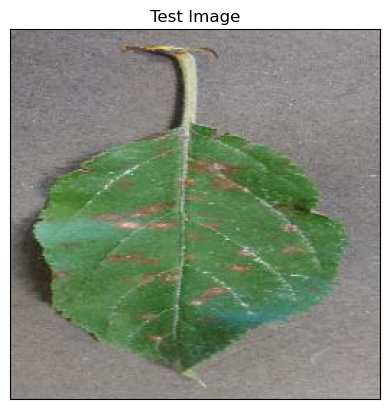

In [7]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [8]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


In [9]:
print(predictions)

[[4.76401896e-09 1.01074058e-07 9.99996185e-01 1.24090155e-10
  1.70848913e-09 9.06305502e-08 2.04143148e-12 2.33225796e-06
  9.92047763e-12 7.66870456e-11 6.30608194e-15 9.13233844e-09
  1.42882945e-11 6.65329727e-12 2.82844304e-11 3.87095644e-09
  5.88221694e-09 1.19821444e-10 7.75047795e-07 1.58363034e-09
  3.51554230e-09 2.39181785e-10 3.88179322e-10 8.19203472e-12
  2.58892456e-11 2.50465742e-11 5.38401875e-12 3.92150548e-12
  2.72253999e-07 5.70616843e-09 3.14812010e-10 1.69487679e-09
  1.43764296e-07 6.04199546e-12 2.60011248e-08 2.22675503e-10
  2.96853514e-10 2.76430462e-10]]


In [10]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


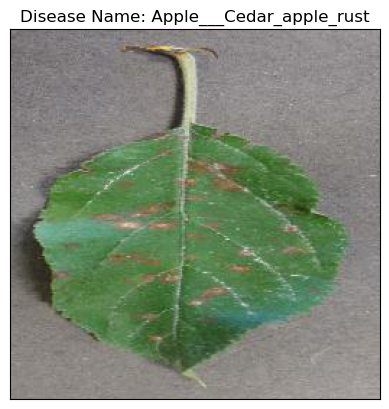

In [11]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()